*Data* Analysis for Anthony's initial data

In [ ]:
!pip install -U pandas-profiling
!pip3 install pandas_profiling --upgrade

In [2]:
# Relevant Standard Processing Libraries
import math
import re
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from IPython.display import Image
import glob
import seaborn as sns
import re
import os
import zipfile
import pandas_profiling


# Load the Data
- Insert the .csv files for performance
- These files can cleaned or not clean

Key - 
- gazeData - contains the time in milliseconds it takes for me to recognize the target
- clickData - the time in milliseconds it takes to click the target
- distData - formatted as follows: (distance to target, target x coord, target y coord)
the distance data is in unity Viewport Coordinates (Bottom left of screen is 0,0 and Top right is 1,1)

In [3]:
# Load the Relevant Files
from google.colab import files
uploaded = files.upload()

Saving anthony_eye_tracking_data.zip to anthony_eye_tracking_data.zip


In [7]:
with zipfile.ZipFile('/content/anthony_eye_tracking_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

path, dirs, files = next(os.walk("/content/Anthony"))
file_count = len(files)

In [12]:
d = {}
for i in range(file_count):
  d["performance_trial_%s_df" %i] = pd.read_csv("/content/Anthony/performance" + str(i) + ".csv", header=0);


for i in range(file_count):
  d["performance_trial_%s_df" %i] = d["performance_trial_%s_df" %i].filter(['DigitalClickTime', 'GazeTime', 'GazeDistance', 'TargetX', 'TargetY'])


frames = [d["performance_trial_%s_df" %i] for i in range(file_count)]
performance_trial_combined_df = pd.concat(frames,ignore_index=True)
performance_trial_combined_df = performance_trial_combined_df.reindex(performance_trial_combined_df.index)


# Shape of the dataframes
print(performance_trial_combined_df.shape);



(420, 5)


In [13]:
performance_trial_combined_df.head(100)

,DigitalClickTime,GazeTime,GazeDistance,TargetX,TargetY
0,881.7595,38.2568,-0.044531,0.315589,0.426251
1,616.1844,0.0325,-1.000000,0.546103,0.794997
2,497.3799,0.0284,-1.000000,0.269486,0.794997
3,672.4967,272.1994,0.482861,0.361692,0.278752
4,520.2196,0.0000,0.184383,0.592205,0.426251
...,...,...,...,...,...
95,625.4501,0.0304,-1.000000,0.684411,0.278752
96,464.0830,0.0670,-1.000000,0.592205,0.721248
97,475.0274,0.0000,0.292742,0.546103,0.426251
98,448.3134,245.1069,0.086572,0.638308,0.721248


In [14]:
# Export final_uncleaned to CSV 
performance_trial_combined_df.to_csv(r'performance_trial_combined_df.csv', index = False, header=True)
from google.colab import files
files.download("performance_trial_combined_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
performance_trial_combined_df.profile_report()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Clean The Data

In [16]:
# clean
performance_trial_combined_df['GazeDistance']  = performance_trial_combined_df['GazeDistance'].apply(lambda x : abs(x))
performance_trial_combined_df = performance_trial_combined_df[performance_trial_combined_df.GazeDistance != 1]
performance_trial_combined_df.shape
# clean
columns = ['GazeTime']
performance_trial_combined_df = performance_trial_combined_df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns)

performance_trial_combined_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


,DigitalClickTime,GazeTime,GazeDistance,TargetX,TargetY
0,881.7595,38.2568,0.044531,0.315589,0.426251
3,672.4967,272.1994,0.482861,0.361692,0.278752
5,475.3609,278.3345,0.125378,0.361692,0.426251
7,466.5169,195.3550,0.097216,0.546103,0.500000
9,461.2538,192.4327,0.009488,0.407795,0.352501
...,...,...,...,...,...
414,638.8540,325.6769,0.076715,0.618626,0.647498
415,407.8851,346.8520,0.182427,0.500000,0.426251
416,354.3197,237.1514,0.036548,0.460458,0.647498
417,420.5765,238.6770,0.100577,0.341831,0.721248


In [18]:
# Export final_uncleaned to CSV 
performance_trial_combined_df.to_csv(r'performance_trial_combined_cleaned.csv', index = False, header=True)
from google.colab import files
files.download("performance_trial_combined_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualize the Data 

In [19]:
# Visualize the cleaned data 
from pandas_profiling import ProfileReport
report = ProfileReport(performance_trial_combined_df)
report.to_file(output_file='summary_of_performance_values.html')

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

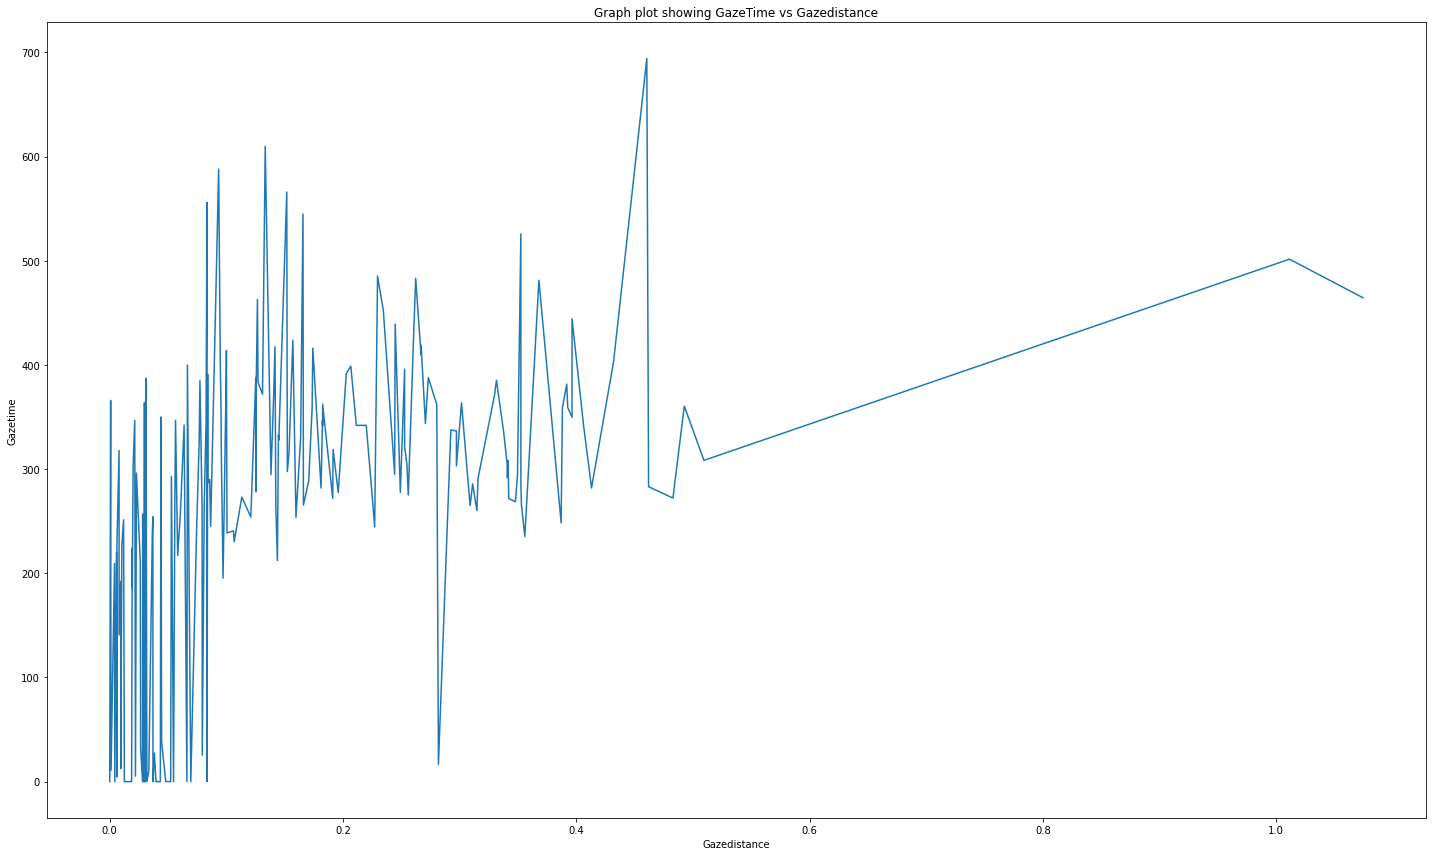

In [20]:
plt.figure(figsize=(20,12))
g = sns.lineplot(data=performance_trial_combined_df, x=performance_trial_combined_df.GazeDistance,y='GazeTime')
g.set_title("Graph plot showing GazeTime vs Gazedistance")
g.set_ylabel("Gazetime")
g.set_xlabel("Gazedistance")
plt.tight_layout()

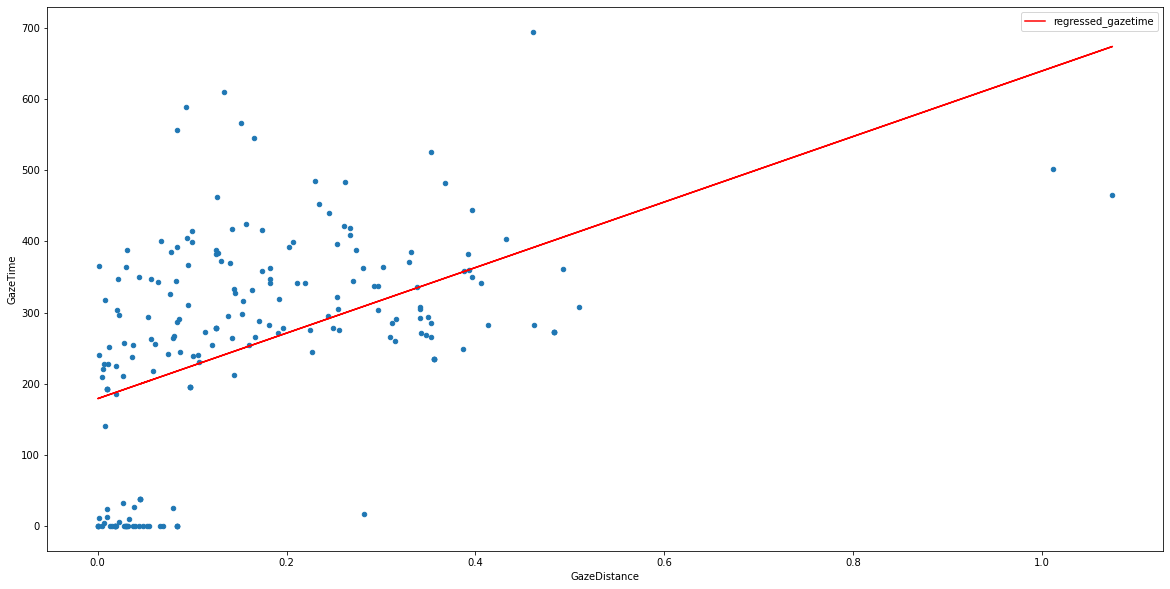

In [21]:
d = np.polyfit(performance_trial_combined_df['GazeDistance'],performance_trial_combined_df['GazeTime'],1)
f = np.poly1d(d)
performance_trial_combined_df.insert(1,'regressed_gazetime',f(performance_trial_combined_df['GazeDistance']))
ax = performance_trial_combined_df.plot(kind = 'scatter', x ='GazeDistance',y='GazeTime', figsize=(20, 10))
performance_trial_combined_df.plot(x='GazeDistance', y='regressed_gazetime',color='Red',ax=ax)

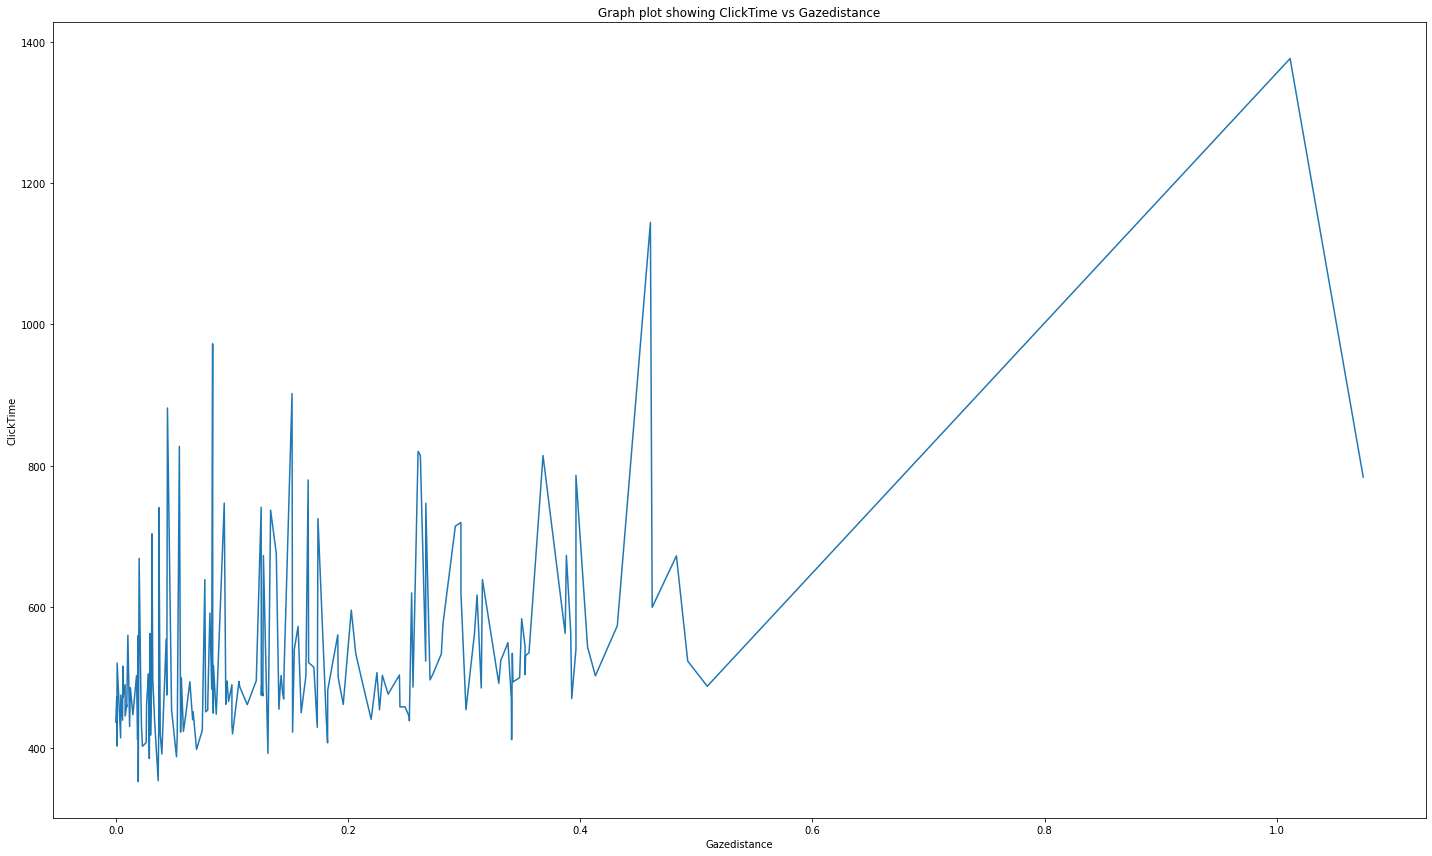

In [23]:
plt.figure(figsize=(20,12))
g = sns.lineplot(data=performance_trial_combined_df, x=performance_trial_combined_df.GazeDistance,y='DigitalClickTime')
g.set_title("Graph plot showing ClickTime vs Gazedistance")
g.set_ylabel("ClickTime")
g.set_xlabel("Gazedistance")
plt.tight_layout()

<Figure size 1440x864 with 0 Axes>

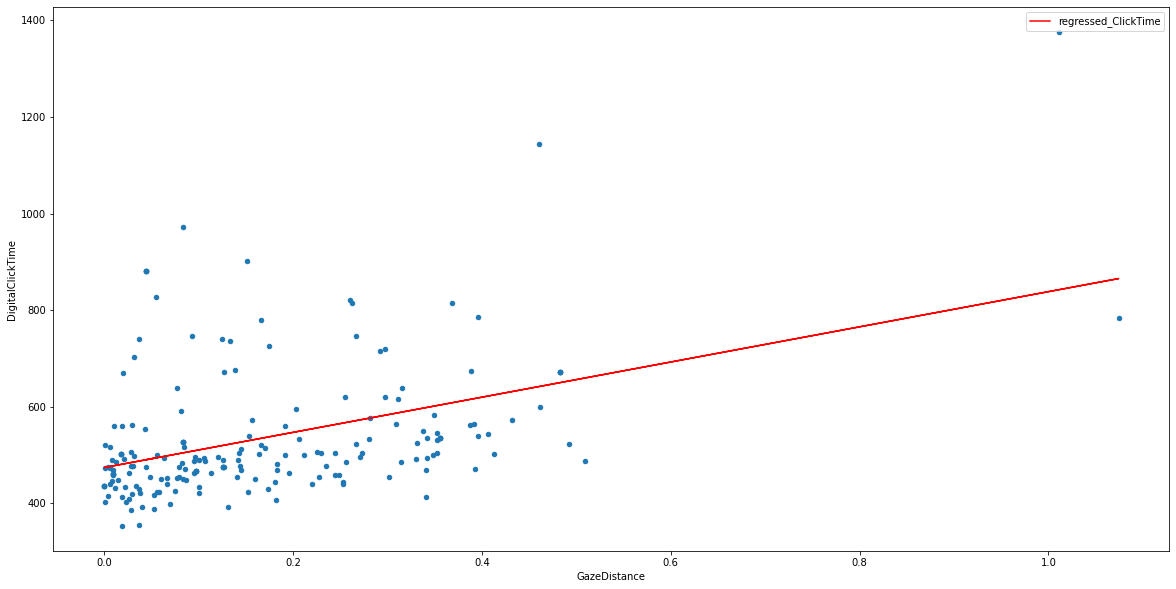

In [25]:
plt.figure(figsize=(20,12))
d = np.polyfit(performance_trial_combined_df['GazeDistance'],performance_trial_combined_df['DigitalClickTime'],1)
f = np.poly1d(d)
performance_trial_combined_df.insert(1,'regressed_ClickTime',f(performance_trial_combined_df['GazeDistance']))
ax = performance_trial_combined_df.plot(kind = 'scatter', x ='GazeDistance',y='DigitalClickTime', figsize=(20, 10))
performance_trial_combined_df.plot(x='GazeDistance', y='regressed_ClickTime',color='Red',ax=ax)